In [1]:
from pricing import visual
from pricing import market_data
from pricing import volatility_estimate
import numpy as np
np.random.seed(42) # fix random seed for reproducibility

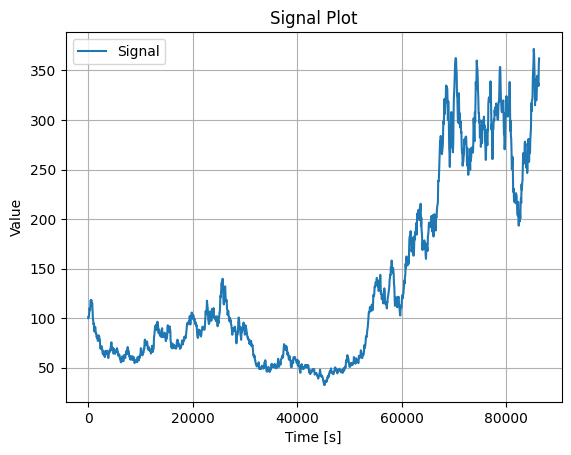

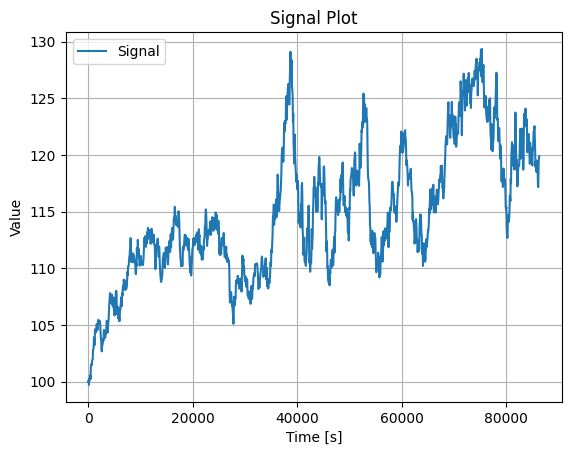

In [2]:
# Ticker	Nome
# run simulation of stock price with given volatilty and drift
input_kwargs = {"volatility": 0.005,
                "drift" : 0.000002,
                "S0" : 100,
                "t0" : 0,
                "T" : 3600*24,
                "dt" : 60}

sim = market_data.simulation(**input_kwargs)
t,val = sim.forward()
visual.plot_signal(t,val)
avg_val = np.zeros_like(val)
M = 100
for i in range(M):
    t,val = sim.forward()
    avg_val += val/M

visual.plot_signal(t,avg_val)


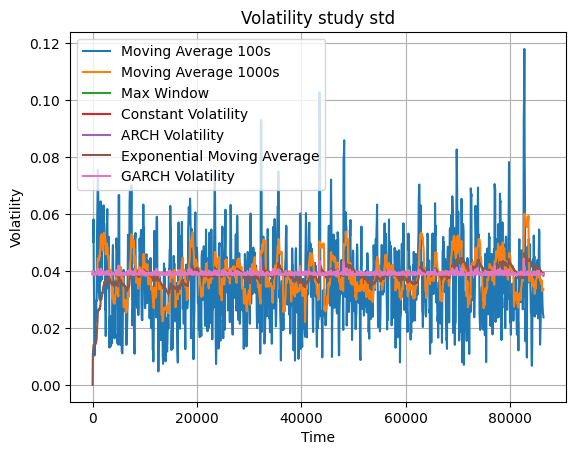

In [ ]:

def analysis(time, signal):
    # get volatity from market data
    vol_estimate = volatility_estimate.VolatilityEstimate(time, signal)
    moving_std_vol_100 = vol_estimate.moving_average_volatility(200)
    moving_std_vol_1000 = vol_estimate.moving_average_volatility(1000)
    max_window_std_vol = vol_estimate.moving_average_volatility(0.99*(time.max()-time.min()))
    constant_std_vol = vol_estimate.moving_average_volatility(10*(time.max()-time.min()))
    arch_vol = vol_estimate.arch_volatility(alpha=0.98)
    exp_vol = vol_estimate.exponential_moving_average(alpha=0.98)
    garch_vol = vol_estimate.garch_volatility(alpha_exp = 0.98, alpha_arch = 0.0)

    vol_collection = [moving_std_vol_100, 
                      moving_std_vol_1000, 
                      max_window_std_vol, 
                      constant_std_vol, 
                      arch_vol,
                      exp_vol,
                      garch_vol]
    visual.plot_signal(time, vol_collection,
                       title="Volatility study std", xlabel="Time", ylabel="Volatility", 
                       label=["Moving Average 100s",
                              "Moving Average 1000s" , 
                              "Max Window" ,
                              "Constant Volatility",
                              "ARCH Volatility",
                              "Exponential Moving Average",
                              "GARCH Volatility"])
                    
    return 

analysis(t, val)
# compute BS price of option

# Implement delta hedging and test that gains/losses are zero


tickers_collection = ['AAPL','MSFT','NVDA',	'AMD','TSLA','META','SPY']
for ticker_name in tickers_collection:
    # download

    # get options 

    # estimate price with different volatilities

    # estimate the actual volatility

    # compare BS price w.r.t. real 

    # payoff graph over time

    # Implement delta hedging

    # Compute losses/gains 

    # Implement gamma, vega, rho

    # compute losses/gains
    pass

    